<a href="https://colab.research.google.com/github/BrianThomasRoss/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/Brian_Ross_LS_DS9_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












## Replicate the lesson code

### Imports

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter 


### Importing the example image
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

### Anatomy of Matplotlib plot

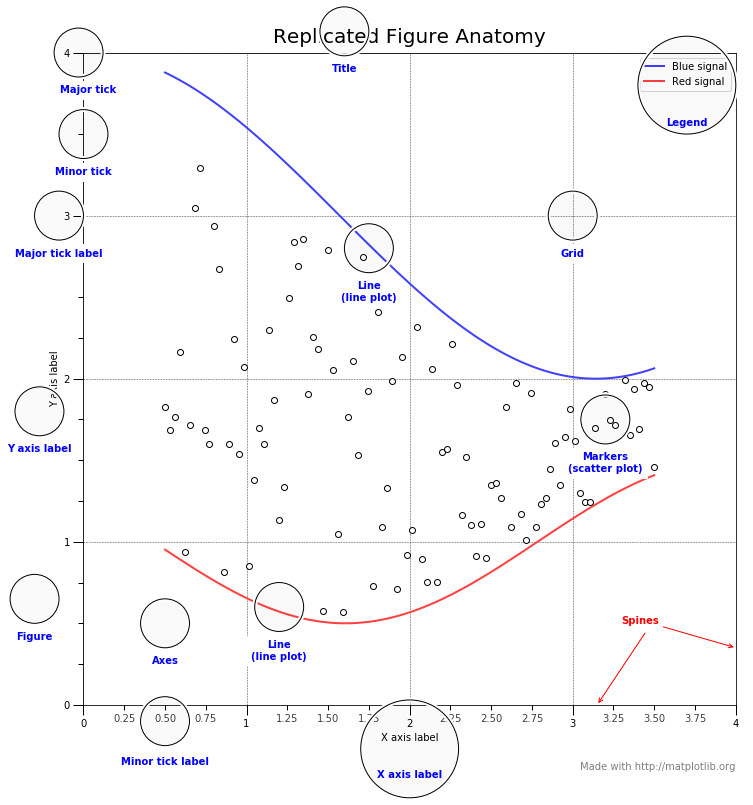

In [11]:


np.random.seed(19680801) # Sets seed

# Defining the variables
X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(12, 12))  # Sets the size of the figure
ax = fig.add_subplot(1, 1, 1, aspect=1) # Sets the size of the plot

# Definining a function to ensure major and minor ticks do not occupy the same
# locations
def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x
# Determines the tick locations
ax.xaxis.set_major_locator(MultipleLocator(1.000)) 
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick)) 

# Set axis view limits
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# Defining the parameters of the ticks
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=10)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

# Calling the grid
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# Blue line
ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
# Red line
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
# Dots
ax.plot(X, Y3, linewidth=0,
        marker='o', markerfacecolor='w', markeredgecolor='k')

# Sets the title and labels
ax.set_title("Replicated Figure Anatomy", fontsize=20, verticalalignment='bottom')
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

# Calling the legend
ax.legend()

# Defining a function to draw a circle
def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke
    circle = Circle((x, y), radius, clip_on=False, zorder=10, linewidth=1,
                    edgecolor='black', facecolor=(0, 0, 0, .0125),
                    path_effects=[withStroke(linewidth=5, foreground='w')])
    ax.add_artist(circle)

# Defining a function to place text on the plot and
# make use of common text style
def text(x, y, text):
    ax.text(x, y, text, backgroundcolor="white",
            ha='center', va='top', weight='bold', color='blue')

# Minor tick
circle(0.50, -0.10)
text(0.50, -0.32, "Minor tick label")

# Major tick
circle(-0.03, 4.00)
text(0.03, 3.80, "Major tick")

# Minor tick
circle(0.00, 3.50)
text(0.00, 3.30, "Minor tick")

# Major tick label
circle(-0.15, 3.00)
text(-0.15, 2.80, "Major tick label")

# X Label
circle(2, -0.27, .3)
text(2, -0.4, "X axis label")

# Y Label
circle(-0.27, 1.80)
text(-0.27, 1.6, "Y axis label")

# Title
circle(1.60, 4.13)
text(1.60, 3.93, "Title")

# Blue plot
circle(1.75, 2.80)
text(1.75, 2.60, "Line\n(line plot)")

# Red plot
circle(1.20, 0.60)
text(1.20, 0.40, "Line\n(line plot)")

# Scatter plot
circle(3.20, 1.75)
text(3.20, 1.55, "Markers\n(scatter plot)")

# Grid
circle(3.00, 3.00)
text(3.00, 2.80, "Grid")

# Legend
circle(3.70, 3.80, .3)
text(3.70, 3.60, "Legend")

# Axes
circle(0.5, 0.5)
text(0.5, 0.3, "Axes")

# Figure
circle(-0.3, 0.65)
text(-0.3, 0.45, "Figure")


color = 'red'

# Annotation for the splines
ax.annotate('Spines', xy=(4.0, 0.35), xytext=(3.3, 0.5),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))
# Sets the second arrow for the spline notation
ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45),
            weight='bold', color=color,
            arrowprops=dict(arrowstyle='->',
                            connectionstyle="arc3",
                            color=color))
# Sets the citation text
ax.text(4.0, -0.4, "Made with http://matplotlib.org",
        fontsize=10, 
        ha="right",
        color='.5')

plt.show()

### fivethirtyeight graph

In [12]:
## copypasta for time


df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
lastday = df['2017-08-29']
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
final = lastday_filtered.tail(1)
final.T
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


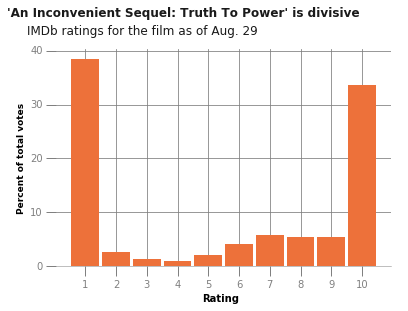

In [16]:
from matplotlib import spines
fig, ax = plt.subplots()



# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Set figure and background opacity to transparent
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

# Title
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.38, 
             y=1.12,
             fontweight='bold',
             color='.1')
# Subtitle
ax.text(s="IMDb ratings for the film as of Aug. 29",
        fontsize=12,
        x=-.9,
        y=43,
        color='.1');

# Tick parameters
ax.tick_params(which='major', width=1.0, color='.5')
ax.tick_params(which='major', length=10, color='.5')
ax.tick_params(which='minor', width=1.0, labelsize=10, color='0.5')
ax.tick_params(which='minor', length=1, labelsize=10, color='0.5')

# Spine settings
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_color('.5')
ax.spines['bottom'].set_linewidth('.5')



# Set grid color
ax.grid(color='.5')
ax.set_axisbelow(True)
ax.yaxis.grid(color='gray')

# Set the x and y axis labels
ax.set_xlabel("Rating",
              fontweight='bold',
              fontsize=10,
              x=.49,
              y=-1)

ax.set_ylabel("Percent of total votes",
              fontsize=9,
              fontweight='bold')

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0, color='.5')
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10), color='.5', va='center')
ax.set_yticks(range(0,50,10));

display(example)

## Reproduce another example

### The Data

In [26]:
### Creating a second example image to reference

url2 = 'https://fivethirtyeight.com/wp-content/uploads/2015/04/barry-jester-datalab-boomersdruguse-actual.png?w=575'
example2 = Image(url=url2, width=600)

display(example2)

In [0]:
### uploading the csv
drug_use = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/drug-use-by-age/drug-use-by-age.csv')

In [84]:
# Exploring
drug_use.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [85]:
drug_use.columns.tolist()

['age',
 'n',
 'alcohol-use',
 'alcohol-frequency',
 'marijuana-use',
 'marijuana-frequency',
 'cocaine-use',
 'cocaine-frequency',
 'crack-use',
 'crack-frequency',
 'heroin-use',
 'heroin-frequency',
 'hallucinogen-use',
 'hallucinogen-frequency',
 'inhalant-use',
 'inhalant-frequency',
 'pain-releiver-use',
 'pain-releiver-frequency',
 'oxycontin-use',
 'oxycontin-frequency',
 'tranquilizer-use',
 'tranquilizer-frequency',
 'stimulant-use',
 'stimulant-frequency',
 'meth-use',
 'meth-frequency',
 'sedative-use',
 'sedative-frequency']

In [86]:
drug_use.age

0        12
1        13
2        14
3        15
4        16
5        17
6        18
7        19
8        20
9        21
10    22-23
11    24-25
12    26-29
13    30-34
14    35-49
15    50-64
16      65+
Name: age, dtype: object

In [87]:
# Filtering to needed age group
boomer_df = drug_use[drug_use.age == '50-64']
boomer_df.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,0.1,41.0,0.3,44.0,0.2,13.5,2.5,12.0,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0


In [88]:
# Filtering out the columns I don't need
boomer_df_filtered = boomer_df[['marijuana-use',
                                'pain-releiver-use',
                                'tranquilizer-use',
                                'cocaine-use',
                                'crack-use',
                                'oxycontin-use',
                                'stimulant-use',
                                'hallucinogen-use',
                                'sedative-use',
                                'inhalant-use',
                                'meth-use',
                                'heroin-use']]

boomer_df_filtered

,marijuana-use,pain-releiver-use,tranquilizer-use,cocaine-use,crack-use,oxycontin-use,stimulant-use,hallucinogen-use,sedative-use,inhalant-use,meth-use,heroin-use
15,7.3,2.5,1.4,0.9,0.4,0.4,0.3,0.3,0.2,0.2,0.2,0.1


In [89]:
# Defining a function to rename the columns
test_cases = ['marijuana-cocaine-use', 'marijuana use', 'rubber-duck-use']

def strip_use(label):
  new_label = label[:-4].replace('-', ' ').title() + 
  return new_label

[strip_use(item) for item in test_cases]



['Marijuana Cocaine', 'Marijuana', 'Rubber Duck']

In [0]:
boomer_df_filtered.columns = boomer_df_filtered.columns.to_series().apply(strip_use)

In [0]:
boomer_df_filtered = boomer_df_filtered.T

In [0]:
plot_data = boomer_df_filtered.reset_index()


In [99]:
plot_data.columns = ['drug', 'use percentage']

plot_data

,drug,use percentage
0,Marijuana,7.3
1,Pain Releiver,2.5
2,Tranquilizer,1.4
3,Cocaine,0.9
4,Crack,0.4
5,Oxycontin,0.4
6,Stimulant,0.3
7,Hallucinogen,0.3
8,Sedative,0.2
9,Inhalant,0.2


### The Graph

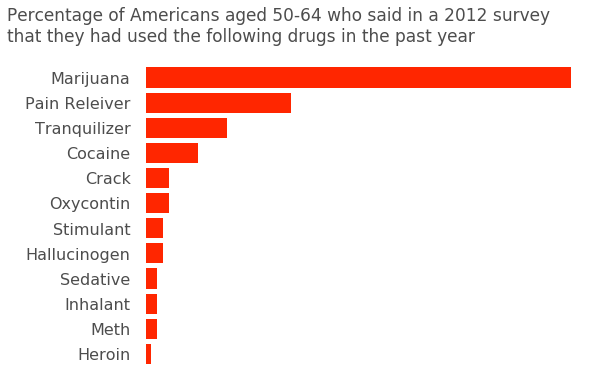

In [188]:
from matplotlib import spines

fig, ax = plt.subplots(figsize=(8,6))

# Example data
drugs = plot_data['drug']
y_pos = np.arange(len(drugs))
performance = plot_data['use percentage']

# Title
ax.set_title('Percentage of Americans aged 50-64 who said in a 2012 survey \nthat they had used the following drugs in the past year',
             ha='left',
             x=-.31,
             y=1.015,
             fontsize=17,
             color='.3')

#Transparency
fig.patch.set(facecolor="none")
ax.set(facecolor="none")

# Bars
ax.barh(y_pos,
        performance,
        align='center',
        color='#FF2600')
ax.set_xticklabels

# Spine settings
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Tick Settings
ax.set_yticks(y_pos)

ax.set_yticklabels(drugs,
                   fontsize=16,
                   color='.3',
                   ha='right')
# Hide Tick marks
plt.tick_params(
    axis='both',         
    which='both',
    length=0,      
    bottom=False,      
    top=False,         
    labelbottom=False,
    pad=15)

# Lists values top to bottom
ax.invert_yaxis()  

plt.show()

display(example2)

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here